# Project - Data Exploration and Storytelling with Berlin Rentals

---
## The description:
This is our very familiar Berlin rentals dataset :)

---
## The dataset:
The datasets contains information about rental appartments in Berlin.
One row is for one appartment. The dataset contains 6 columns.  
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: How many square meters does the flat has?

---
## The Task:

You want to find why some flats are more expensive than others. For this we will explore the different variables.
1. Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the flat. Example: "I believe flat in Mitte are more expensive than in Neukölln."  or "I think the bigger the flat, the higher the price".
2. Create an analysis for every hypothesis. Show your conclusion with a plot.
3. Write a short conclusion to every hypothesis.

Hint:
- check out the lecture colab notebook
- check out seaborns library: https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatter#seaborn.scatterplot
- inspiration: https://www.kaggle.com/code/jsaguiar/exploratory-analysis-with-seaborn/notebook
- inspiration: https://www.analyticsvidhya.com/blog/2021/07/data-visualization-using-seaborn-for-beginners/

In [ ]:
# Imports
import pandas as pd
import seaborn as sns

# Get the dataset
rentals = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')

In [ ]:
#rentals.info()
rentals.head(5)

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [ ]:
rentals.shape

(764, 6)

In [ ]:
rentals.nunique() # I want to check unique number of value in each column.

,0
Region,10
Condition,9
Rooms,11
Rent,639
Year_Construction,93
Space,571


In [ ]:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


<Axes: >

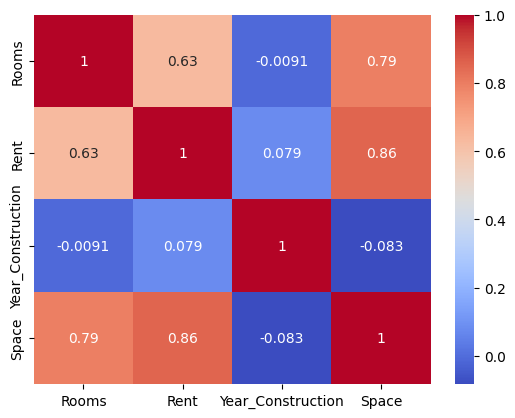

In [ ]:
correlation_matrix = rentals.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm')

Based on the heatmap,there is a positive strong correlation between rent and space(0.86),space and room also has a  positive correlation (0.79),there is medium positive correlation of 0.63 between rent and rooms.
Therefore positive correlation between rent and space implies that the bigger the apartment,the more expensive the rents.


In [ ]:
rentals['Region'].value_counts() # I want to know how many rooms are available in each region.

,count
Region,
Tiergarten,171
Mitte,153
Charlottenburg,79
Neukölln,59
Köpenick,55
Wilmersdorf,53
Prenzlauer,53
Friedrichsfelde,52
Kreuzberg,47


In [ ]:
rentals.groupby('Region')[['Rent']].agg(['mean', 'min', 'max', 'std']) # Base on this information I will formulate my hypothesis.
#Hypothesis 1: I think Flats in regions nearby or in central city have higher prices.

Rent                               
                        mean     min       max          std
Region                                                     
Charlottenburg   1753.452532  478.52   9774.00  1125.786523
Friedrichsfelde  1043.871731  280.74   2138.68   403.402469
Kreuzberg        2049.138085  435.74   6450.00  1172.802355
Köpenick         1125.475818  558.06   2159.20   390.822563
Mitte            2408.725033  398.00  14207.00  1543.059190
Neukölln         1188.114915  379.95   2295.00   552.145415
Prenzlauer       1996.962264  475.00   5930.00  1088.544439
Tiergarten       1914.824795  271.25   4945.00   786.464690
Wedding           847.138571  352.95   1949.26   333.446416
Wilmersdorf      1748.646226  404.39   5876.35   941.443278

The mean rent in the Mitte region is fairly high at 2408.73,and there is considerable variability in the rents,with a standard deviation of 1543.06.This illustrates that although the average rent is 2408.73,some rooms could have higher or lower rents,making it a region with highest and a wide range of prices since it is found at the center of Berlin city.
In addition Kreuzberg has second highest average price ,could be because the area is close to Mitte and it has unique attractive neighbourhood,followed by Prenzlauer and Tiergarten.

In [ ]:
import matplotlib.pyplot as plt

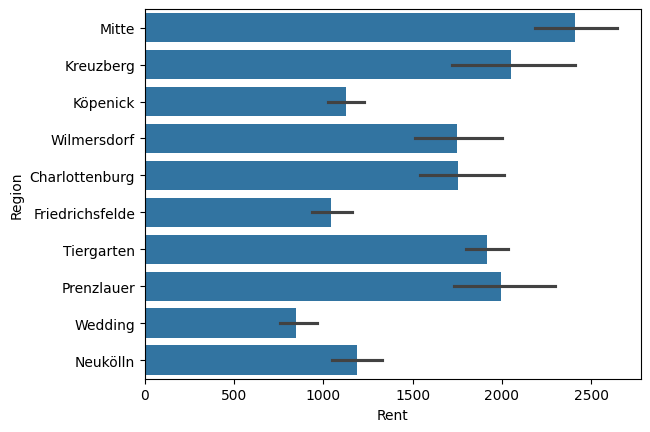

<Figure size 1100x700 with 0 Axes>

In [ ]:
sns.barplot(rentals, x = 'Rent', y = 'Region')
plt.figure(figsize=(11, 7))
plt.show()

In [ ]:
# Hypothesis 2: Flats in excellent condition have higher prices than those in well kept condition.
rentals.groupby('Condition')[['Rent']].agg(['mean', 'min', 'max', 'std'])

Rent                               
                                           mean     min       max          std
Condition                                                                     
first_time_use                      1866.564222  525.00   6855.48   856.186832
first_time_use_after_refurbishment  1925.351944  512.93   4288.00   722.825103
fully_renovated                     1778.308571  420.09   4875.00  1228.564947
mint_condition                      2122.196154  398.00  14207.00  1529.361027
modernized                          1185.705172  577.00   2815.00   520.457098
need_of_renovation                   612.290000  433.71    885.68   211.020361
no_information                      1544.274955  311.04   9774.00  1052.064596
refurbished                         2177.256500  475.00   5936.40  1405.959185
well_kept                           1217.096979  271.25   5876.35   862.235553

The mean price for flats in mint condition (2122.20) is significantly higher than the mean price for flats in well kept condition (1217.096).
Furthermore,the flat in mint condition have a wider range of prices,from 398.00 to 14207.00,compared to well kept flats,which range from 271.25 to 5876.35.We can see that while mint condition flats can be sold for very high prices,well kept flats are restricted to lower maximum prices.
In addition, the standard deviation for mint condition flats (1529.36) is higher than well kept flats (862.24),which shows that prices for mint condition flats are more spread out.This also indicates a broader variety in pricing,probably due to differences in location,size or other factors.


In [ ]:
mint_condition_rentals = rentals[rentals['Condition'] == 'mint_condition']
print(mint_condition_rentals)

          Region       Condition  Rooms     Rent  Year_Construction   Space
6          Mitte  mint_condition    2.0  1509.45               2015   61.61
13     Kreuzberg  mint_condition    2.0  6450.00               2016  186.00
17      Köpenick  mint_condition    1.0   930.00               2018   29.12
22    Prenzlauer  mint_condition    3.0  1831.00               2019   72.28
24    Prenzlauer  mint_condition    3.0  3103.00               1918  141.75
..           ...             ...    ...      ...                ...     ...
753      Wedding  mint_condition    1.0   720.00               2017   20.50
756      Wedding  mint_condition    1.0   772.00               2017   20.50
759      Wedding  mint_condition    1.0   959.00               2017   27.80
760      Wedding  mint_condition    1.0   649.00               2017   20.50
761  Wilmersdorf  mint_condition    4.0  2750.00               2017  110.00

[143 rows x 6 columns]


Alot of rooms are in mint condition are of high prices and also there is wide range of prices ,meaning most could be luxerious flats.

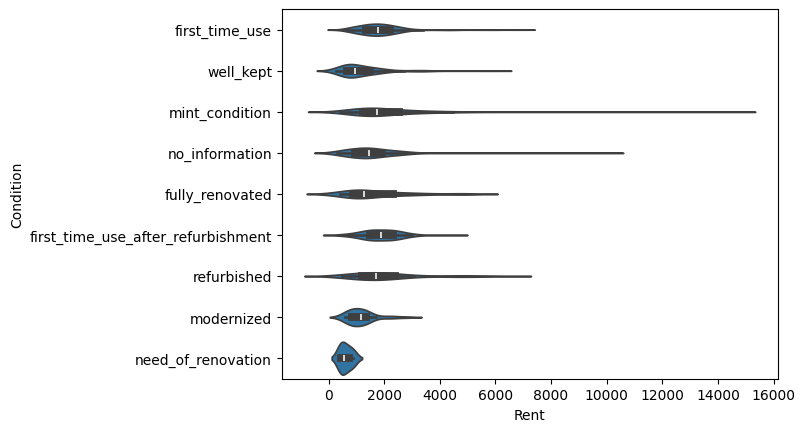

<Figure size 1100x700 with 0 Axes>

In [ ]:
sns.violinplot(rentals, x = 'Rent', y ='Condition')
plt.figure(figsize=(11, 7))
plt.show()


The hypothesis is true,looking at the violinplot flats in mint condition have,on average extremely higher prices than those in well-kept condition.The variability in mint condition flats propose that while some may be priced lower,the potential for very high prices exists,especially for luxurious apartments.

In [ ]:
# Hypothesis 3: I think flats with more rooms have higher prices.
mean_rent_by_rooms = rentals.groupby('Rooms')[['Rent']].mean()
print(mean_rent_by_rooms)

              Rent
Rooms             
1.0     833.258318
1.5     882.735556
2.0    1358.017786
2.5    1691.043750
3.0    2048.237042
3.5    1901.928750
4.0    2690.214242
4.5    1370.000000
5.0    4359.084211
6.0    3739.460000
7.0    5082.175000


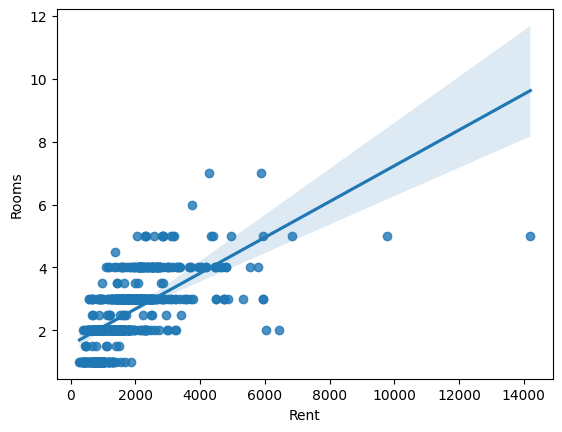

<Figure size 1100x700 with 0 Axes>

In [ ]:
sns.regplot(rentals, x = 'Rent', y = 'Rooms')
plt.figure(figsize= (11, 7))
plt.show()

I can see that this data supports the hypothesis.As the number of rooms increases,the mean rent also increases, with bigger flats demanding very high rents.For instance,flats with 1 room have an average rent of 833.26,while those with 7 rooms have an average rent of 5082.18,showing a consistent positive relationship between the number of rooms and the rent.

In [ ]:
# Hypothesis 4: I think newer flats have higher prices than old flats.
mean_rent_by_year = rentals.groupby('Year_Construction')[['Rent']].mean()
print(mean_rent_by_year)

                          Rent
Year_Construction             
1864               2199.000000
1867               4400.000000
1870               1650.624286
1873               2708.000000
1874               1399.000000
...                        ...
2016               1921.265714
2017               1423.684889
2018               2075.842414
2019               1937.523757
2020               1520.294655

[93 rows x 1 columns]


I can see that older flats which were constructed in 1864 show an average rent of 2199.00.And in 1867,the average rent is 4400.00,which is exceptionally high compared to other older years.
Again, most recent years,like 2016,have an average rent of 1921.27,and in 2020,the average rent is 1520.29.
The **data does not** clearly support the hypothesis.Because while we might expect newer flats to have higer prices,the rent values for more recently constructed flats from 2016-2020 are generally lower than for some older apartments like in 1867.
I noticed an outlier, in 1867 average rent is extremely high compared to some older flats and new flats.This could mean that heritage properties in specific locations may demand premium prices,possible because of architectural significance.

<Axes: >

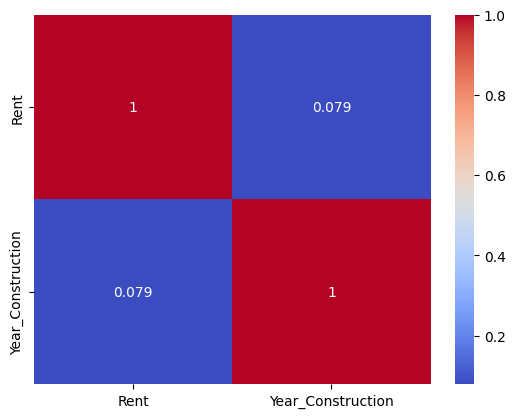

In [ ]:
correlation_matrix = rentals[['Rent','Year_Construction']].corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm')

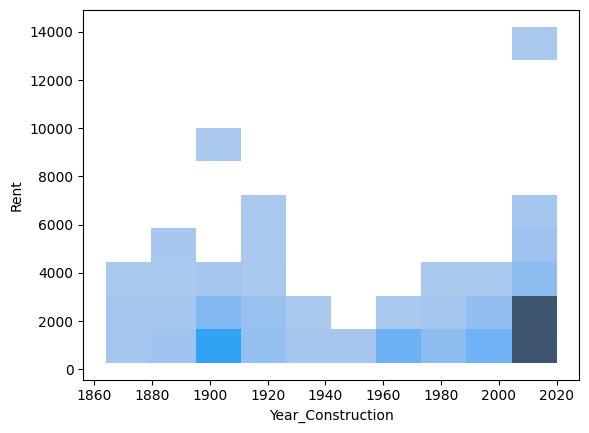

<Figure size 1100x700 with 0 Axes>

In [ ]:
sns.histplot(rentals, x = 'Year_Construction', y = 'Rent',bins=10)
plt.figure(figsize= (11, 7))
plt.show()

To conclude,unique features or historical value may influence the rent for older flats ,therefore this hypothesis is not valid.

            Rent
Space           
14.00     450.00
18.00     436.50
19.00     715.00
19.22     622.00
20.00     699.00
...          ...
274.00   9774.00
286.84   6855.48
300.00   5876.35
324.00   5930.00
413.91  14207.00

[571 rows x 1 columns]


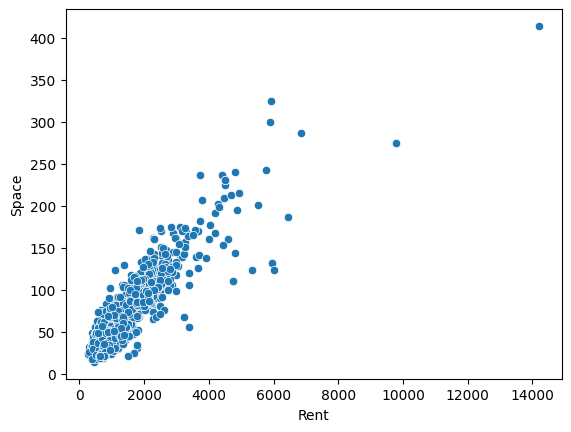

<Figure size 1100x700 with 0 Axes>

In [ ]:
#Hypothesis 5: Larger flats have higher prices.
mean_rent_by_space = rentals.groupby('Space')[['Rent']].mean()
print(mean_rent_by_space)
sns.scatterplot(rentals, x = 'Rent', y = 'Space')
plt.figure(figsize= (11, 7))
plt.show()

Based on this data there is a positive relationship between rent and space,some flats with bigger spaces have high prices in some locations.However,I can see one outlier,few flats with space of 274.00 smaller than other flats with a very high  price of 9774.00,for instance ,bigger flats with space of 324.00,300.00 and 286.84 has lower rent of 6855.48,5876.35,5930.00.
To conclude,this **data does not support ** the hypothesis because there are few flats having small space with high prices while some flats with larger space have lower prices.
This indicates that there could be small space luxerious apartments in some location.

In [ ]:
#@title Review Criteria:
%%html
<h3><input type="checkbox"> 1. Are all questions answered? <br></h3>
<h3><input type="checkbox"> 2. Does all code run through? <br></h3>
<h3><input type="checkbox"> 3. Are the conclusions understandable?  <br></h3>
<h3><input type="checkbox"> 4. Are the bonus question answered?  <br></h3>

In [ ]:
input("Do you have any feedback?")